## Univariate Analysis
 Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, only one variable is analyzed. It doesn't deal with relationships and it's major purpose is to describe, it takes data, summarizes that data and finds patterns in the data.

In [1]:
#importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load the dataset into a dataframe(file containing data)

df=pd.read_excel('current2403.xlsx',index_col=0)

In [3]:
df.shape

(16536, 9)

In [4]:
df.head()

,title,projectname,builder,price,per_sqft,area,status,place,rating
0,3 BHK Apartment,Ecogreen Casa Traimbak,Eco Green Builders,6598000,4200,1571,Under Construction,Gundlapochampally,0.0
1,4 BHK Villa,Elemental Village,Elemental Realty,14800000,7700,1930,Under Construction,Patancheru,0.0
2,4 BHK Villa,Riddhi Laxman County,Riddhi Group,29900000,7200,4157,Under Construction,Tukkuguda,0.0
3,4 BHK Villa,APR Praveens Hillside,APR Group,40800000,12000,3400,Under Construction,Bachupally,0.0
4,4 BHK Villa,Sri GREENTECH O2 Community,Sri Aditya Squares,17500000,5500,3183,Under Construction,Ramachandrapuram,0.0


In [5]:
# Returns the maximum and minimum values from a particular column.

def values(x):
    max_=df[x].idxmax()
    max_details=pd.DataFrame(df.loc[max_])
    
    min_=df[x].idxmin()
    min_details=pd.DataFrame(df.loc[min_])
    
    both=pd.concat([max_details,min_details],axis=1)
    
    return both

we consider our target variable as price.

In [6]:
values("price")

,5430,9909
title,Residential Plot,Residential Plot
projectname,NaN,NaN
builder,Venu Gopal,madhavi latha
price,720000000,130000
per_sqft,44444,119
area,16200,1089
status,Resale,New
place,Jubilee Hills,Narayankhed
rating,0.0,NaN


In [7]:
d=df[(df['price']>=100000)&(df['price']<=1000000)]
d.shape

(256, 9)

In [8]:
d1=d['title'].value_counts()
d1

Residential Plot     254
1  BHK  Apartment      1
2  BHK  Apartment      1
Name: title, dtype: int64

Text(0.5, 1.0, 'Type of properties')

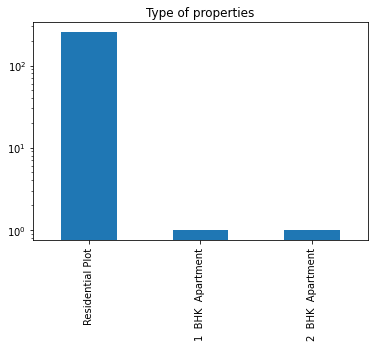

In [9]:
d1.plot.bar() # Plotting bar graph
plt.yscale('log') 
# we use log function so that least values can also be clearly visible.
#(when log is not used values such as 3,2,1,1 are barely visible in graph as highest count is 2121)
plt.title("Type of properties")

In [10]:

d2=d['place'].value_counts()
d2

Shadnagar                  34
Yadagirigutta              23
Warangal Highway Aler      20
Ibrahimpatnam              20
Wangapalli                 10
                           ..
Keshampet                   1
Osman Nagar                 1
Nagarjuna Sagar Highway     1
West Marredpally            1
Rachloor                    1
Name: place, Length: 84, dtype: int64

<AxesSubplot:>

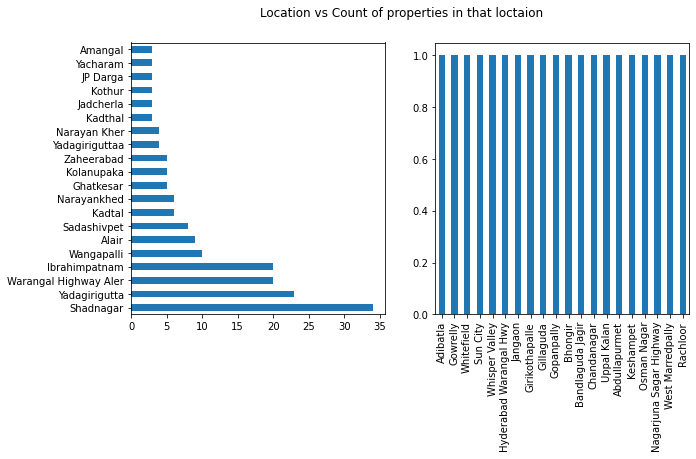

In [11]:
f,ax=plt.subplots(1,2,figsize=(10,5)) # Defining plot size and subplots.
f.suptitle("Location vs Count of properties in that loctaion") # Title for the plot.
d2.head(20).plot(kind='barh',ax=ax[0]) # Plot for top 20 values.

d2.tail(20).plot(kind='bar',ax=ax[1]) # Plot for least 20 values.

In [12]:
#returns total number for locations whose count is 1.

len((d['place'].value_counts())==1)

84

C:\Users\shing\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

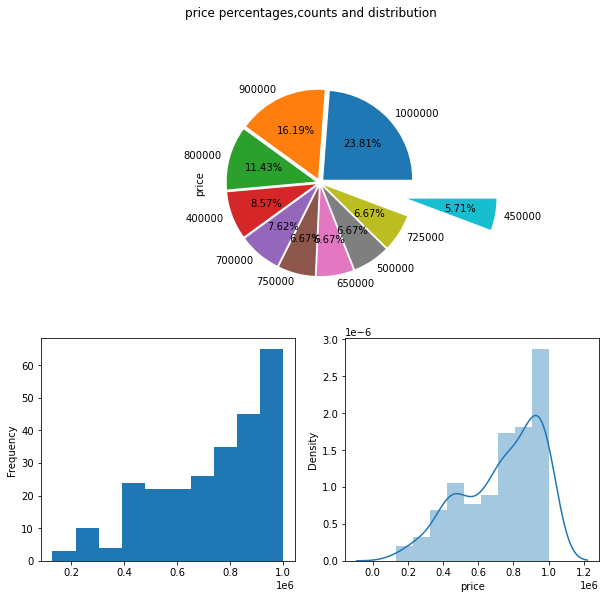

In [13]:
f,ax=plt.subplots(figsize=(10,9)) # Plot size
ax1=plt.subplot(211) 
f.suptitle("price percentages,counts and distribution") # Plot title
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,1) # Distance between each sub-pie.
d['price'].value_counts(ascending=False).head(10).plot(kind='pie',autopct="%0.2f%%",explode=explode,ax=ax1)
# Pie plot for top 10 values of price.

ax2=plt.subplot(223)
d['price'].plot.hist() # Histogram for all prices.
ax2.plot

ax3=plt.subplot(224)
sns.distplot(d['price'],ax=ax3) # Distribution plot for all prices.

<AxesSubplot:ylabel='Frequency'>

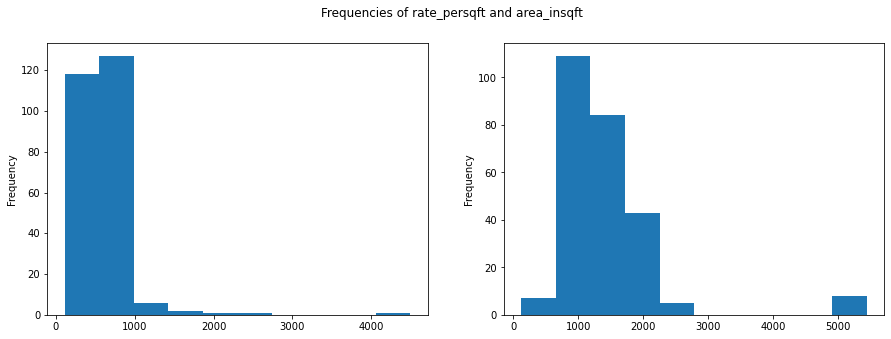

In [14]:
f,ax=plt.subplots(1,2,figsize=(15,5))
f.suptitle("Frequencies of rate_persqft and area_insqft") # Plot title
d['per_sqft'].plot(kind='hist',ax=ax[0]) # Histogram for rate_persqft.

d['area'].plot(kind='hist',ax=ax[1]) # Histogram for area_insqft.

In [15]:
d['status'].value_counts()

New                   178
Resale                 76
Under Construction      1
Ready to move           1
Name: status, dtype: int64

C:\Users\shing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


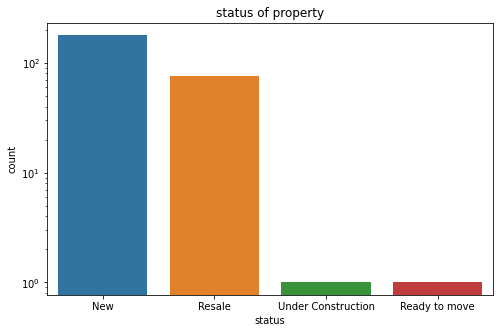

In [16]:
fig,ax=plt.subplots(figsize=(8,5))
sns.countplot(d['status'],ax=ax) # Count plot
plt.title("status of property") # Plot title
plt.yscale('log')
#(log is used such that even small values such as 3,4,6,1 are also visib

Text(0.5, 1.0, 'Count of ratings')

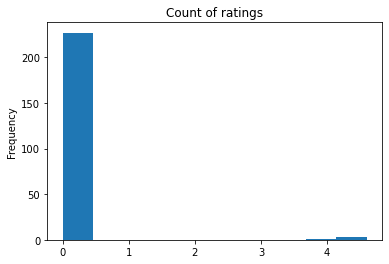

In [18]:
d['rating'].plot(kind='hist') # Histogram plot
plt.title("Count of ratings") # title for plot

In [19]:
b=df[(df['price']>1000000)&(df['price']<=2000000)]
b.shape

(2441, 9)

In [20]:
def title(x):
    x.plot.bar() # x is the dataframe.
    plt.yscale('log')
    plt.title("Type of properties")

In [21]:
def location(x):
    f,ax=plt.subplots(1,2,figsize=(10,5))
    f.suptitle("Location vs Count of properties in that loctaion")
    x.head(20).plot(kind='barh',ax=ax[0])  # x is the dataframe.

    x.tail(20).plot(kind='bar',ax=ax[1]) # x is the dataframe. 

In [22]:
def price(x):
    f,ax=plt.subplots(figsize=(10,9))
    ax1=plt.subplot(211)
    f.suptitle("price percentages,counts and distribution")
    explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,1)
    x['price'].value_counts(ascending=False).head(10).plot(kind='pie',autopct="%0.2f%%",explode=explode,ax=ax1)
    # x is the dataframe.
    
    ax2=plt.subplot(223)
    x['price'].plot.hist()  # x is the dataframe.
    ax2.plot

    ax3=plt.subplot(224)
    sns.distplot(x['price'],ax=ax3)  # x is the dataframe.

In [36]:
def area_rate(x):
    f,ax=plt.subplots(1,2,figsize=(15,5))
    f.suptitle("Frequencies of rate_persqft and area_insqft")
    x['per_sqft'].plot(kind='hist',ax=ax[0])  # x is the dataframe.

    x['area'].plot(kind='hist',ax=ax[1])   # x is the dataframe.

In [40]:
def b_status(x):
    fig,ax=plt.subplots(figsize=(8,5))
    sns.countplot(x['status'],ax=ax)  # x is the dataframe.
    plt.title("status of property")
    plt.yscale('log')

In [25]:
def rating(m):
    m['rating'].plot(kind='hist')  # m is the dataframe.
    plt.title("Count of ratings")

In [28]:
b1=b['title'].value_counts()
b1

Residential Plot             2403
1  BHK  Apartment              12
2  BHK  Apartment              11
1  BHK  Independent House       7
3  BHK  Apartment               6
3  BHK  Villa                   1
4  BHK  Apartment               1
Name: title, dtype: int64

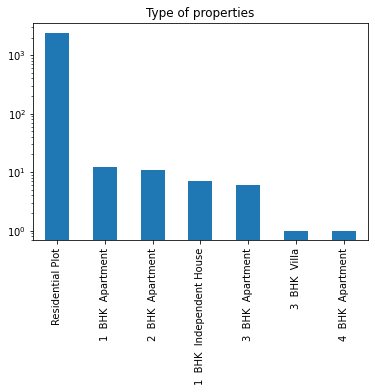

In [29]:
title(b1)

In [31]:
b2=b['place'].value_counts()
b2

Mirkhanpet             376
Meerkhanpet            253
Mucherla               144
Shadnagar              126
Yacharam                99
                      ... 
Rudraram                 1
Wadi E Mahmood           1
kandukur Mandal          1
Narne Estates            1
Adarsh Nagar Colony      1
Name: place, Length: 294, dtype: int64

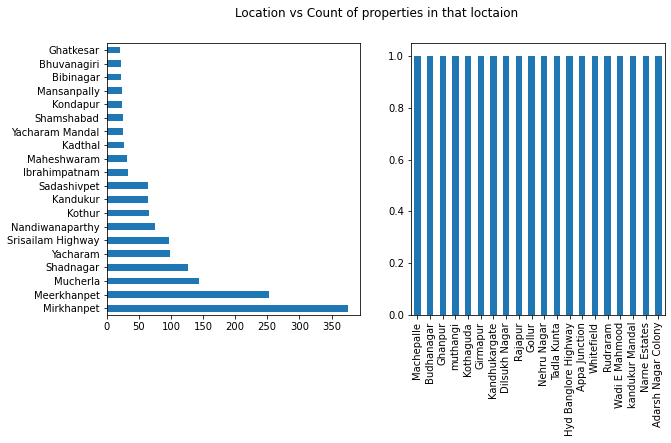

In [32]:
location(b2)

In [33]:
len((b['place'].value_counts())==1)

294

C:\Users\shing\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


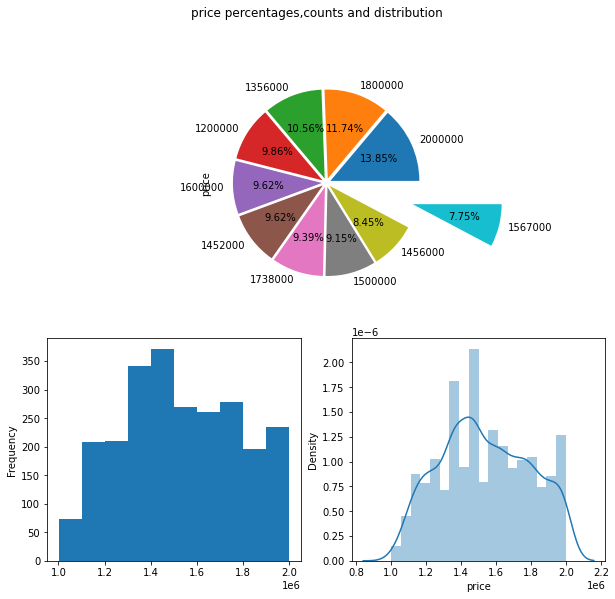

In [34]:
price(b)

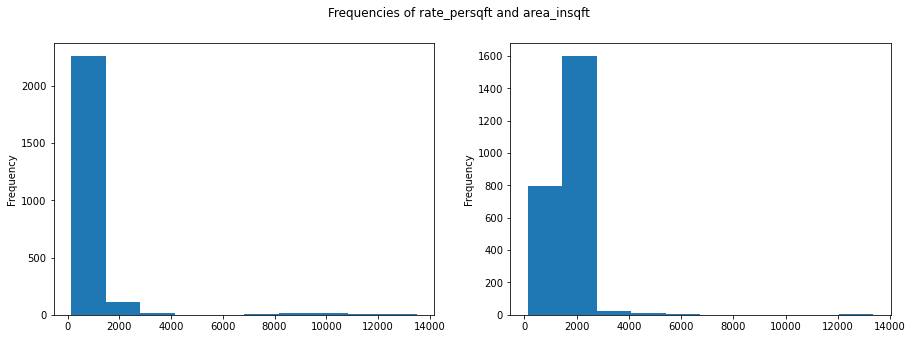

In [37]:
area_rate(b)

In [38]:
b['status'].value_counts()


New                   1924
Resale                 479
Ready to move           22
Under Construction      16
Name: status, dtype: int64

C:\Users\shing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


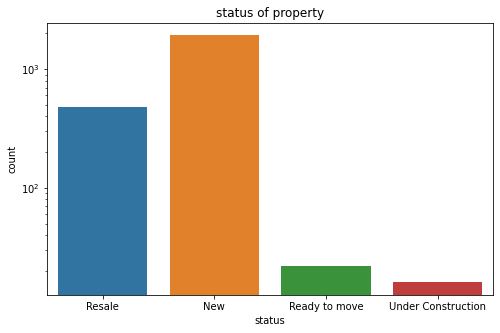

In [41]:
b_status(b)

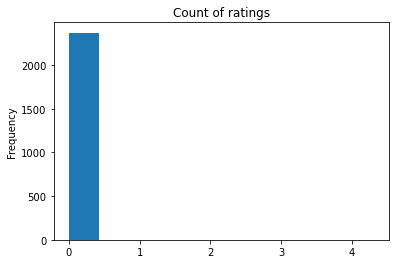

In [42]:
rating(b)

In [45]:
c=df[(df['price']>2000000)&(df['price']<=3000000)]
c.shape  

(1896, 9)

In [46]:
c1=c['title'].value_counts()
c1

Residential Plot             1752
2  BHK  Apartment              85
1  BHK  Apartment              37
3  BHK  Apartment              10
1  BHK  Independent House       4
2  BHK  Independent House       3
1  RK  Studio Apartment         2
2  BHK  Independent Floor       2
3  BHK  Villa                   1
Name: title, dtype: int64

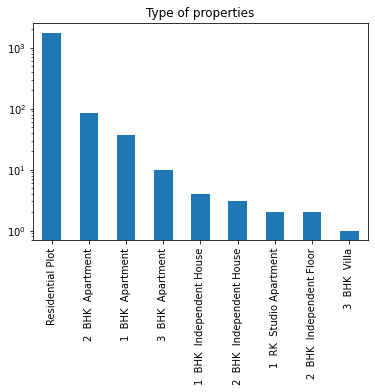

In [47]:
title(c1)

In [48]:
c2=c['place'].value_counts()
c2

Mirkhanpet                                 159
Mansanpally                                150
Meerkhanpet                                141
Maheshwaram                                114
Sadashivpet                                 91
                                          ... 
AS Rao Nagar                                 1
Hyderabad Warangal Bhopalpatnam Highway      1
Rudaram                                      1
Venkat Nagar Colony                          1
Puppalaguda                                  1
Name: place, Length: 247, dtype: int64

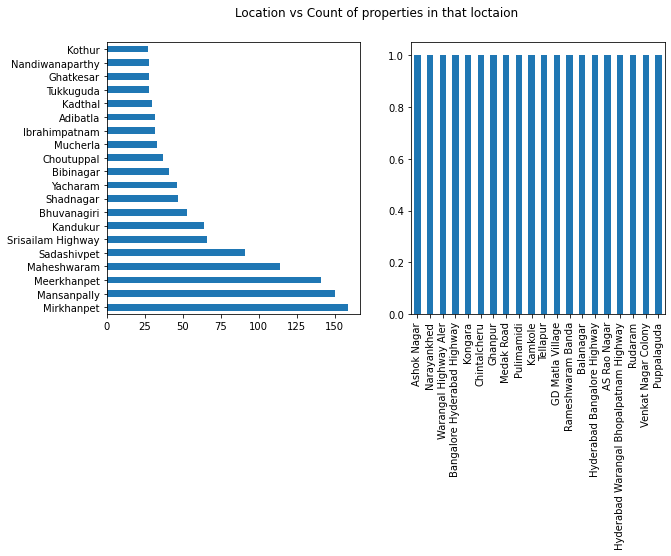

In [49]:
location(c2)

In [50]:
len((c['price'].value_counts())==1)

483

C:\Users\shing\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


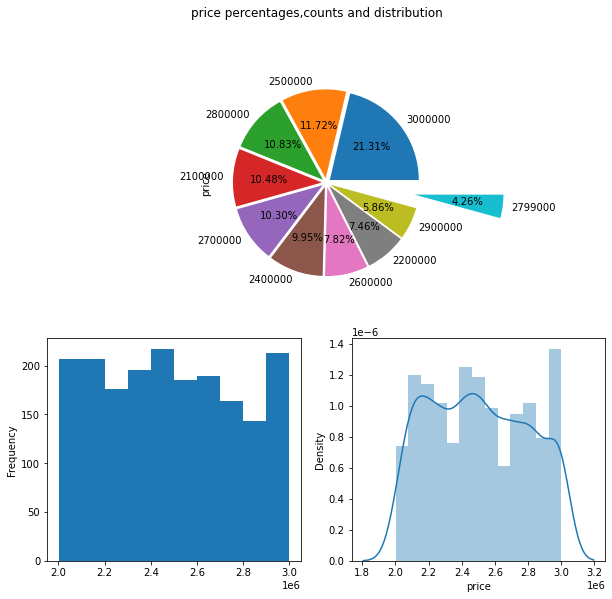

In [51]:
price(c)

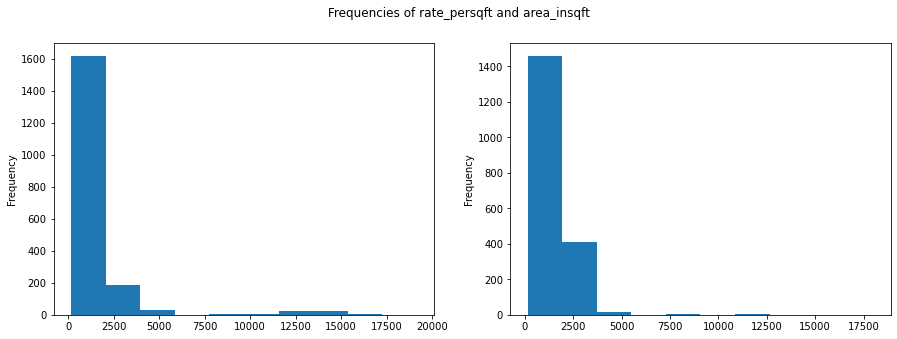

In [52]:
area_rate(c)

In [53]:
c['status'].value_counts()


New                   1530
Resale                 222
Under Construction     103
Ready to move           41
Name: status, dtype: int64

C:\Users\shing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


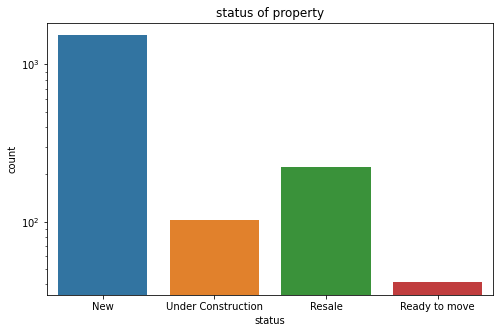

In [54]:
b_status(c)

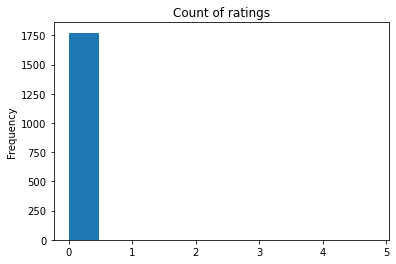

In [55]:
rating(c)

In [56]:
q=df[(df['price']>3000000)&(df['price']<=4000000)]
q.shape

(1339, 9)

In [57]:
q1=q['title'].value_counts()
q1

Residential Plot             954
2  BHK  Apartment            275
3  BHK  Apartment             55
1  BHK  Apartment             18
2  BHK  Independent House     11
1  RK  Studio Apartment        7
1  BHK  Independent House      4
2  BHK  Independent Floor      4
2  BHK  Villa                  4
3  BHK  Independent Floor      2
4  BHK  Independent House      2
1  BHK  Villa                  1
4  BHK  Independent Floor      1
4  BHK  Villa                  1
Name: title, dtype: int64

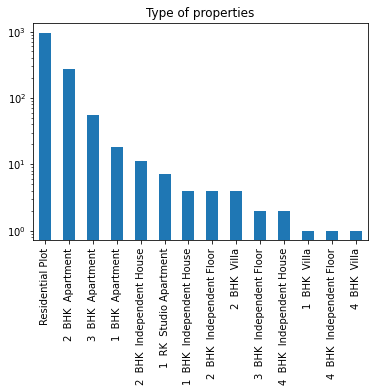

In [58]:
title(q1)

In [59]:
q2=q['place'].value_counts()
q2

Sadashivpet           57
Maheshwaram           55
Tukkuguda             50
Shamirpet             48
Sangareddy            37
                      ..
Lakdikapul             1
Banjara Hills          1
Annojiguda             1
Sevalal Nagar          1
Bhagat Singh Nagar     1
Name: place, Length: 268, dtype: int64

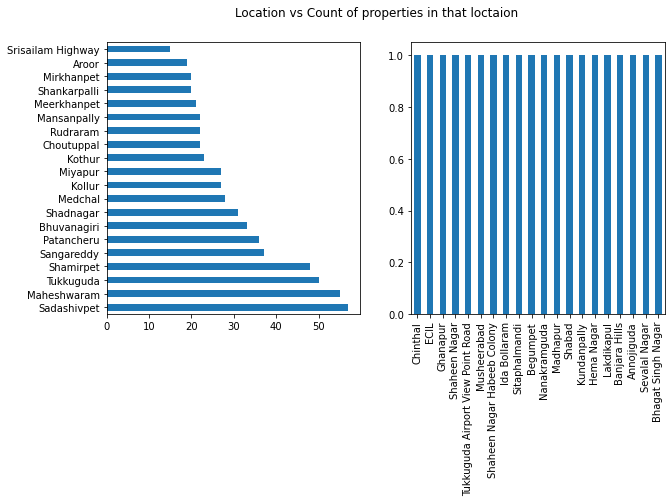

In [60]:
location(q2)

In [61]:
len((q['place'].value_counts())==1)

268

C:\Users\shing\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


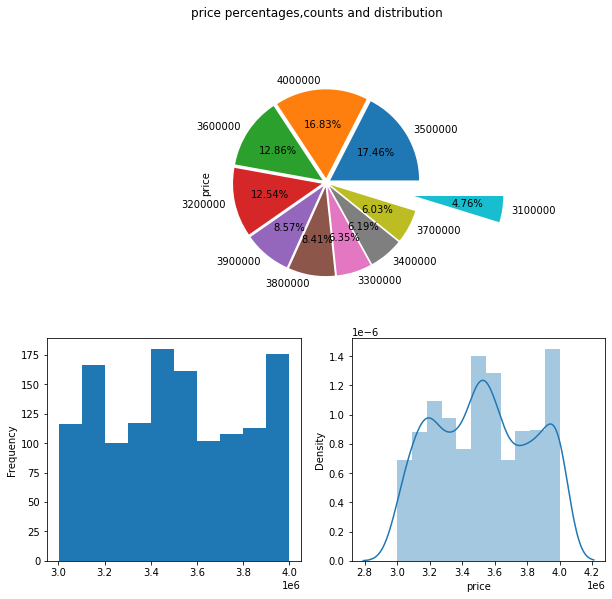

In [62]:
price(q)

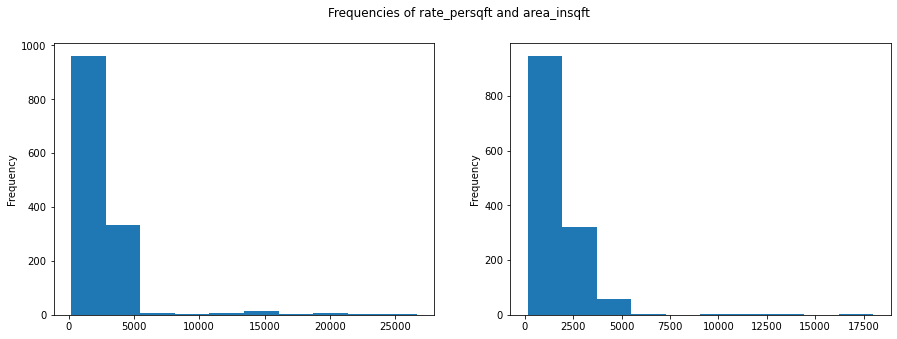

In [63]:
area_rate(q)

In [64]:
q['status'].value_counts()

New                   796
Under Construction    238
Resale                158
Ready to move         146
Name: status, dtype: int64

C:\Users\shing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


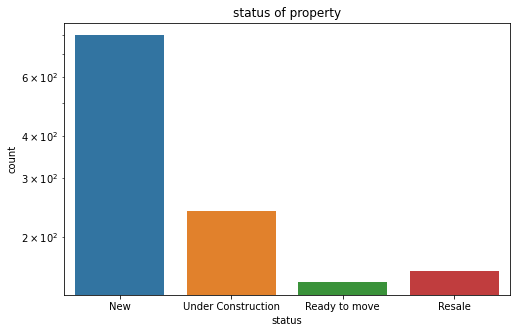

In [65]:
b_status(q)

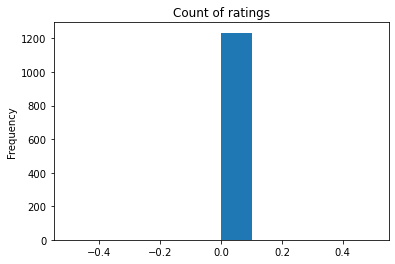

In [66]:
rating(q)

In [68]:
w=df[(df['price']>4000000)&(df['price']<=5000000)]
w.shape

(1162, 9)

In [69]:
w1=w['title'].value_counts()
w1

2  BHK  Apartment            549
Residential Plot             463
3  BHK  Apartment             73
2  BHK  Independent Floor     34
2  BHK  Independent House     23
1  BHK  Apartment              8
2  BHK  Villa                  3
3  BHK  Independent Floor      2
4  BHK  Apartment              2
3  BHK  Villa                  2
1  BHK  Independent House      1
3  BHK  Independent House      1
1  BHK  Villa                  1
Name: title, dtype: int64

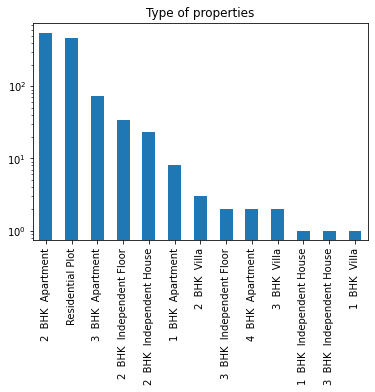

In [70]:
title(w1)

In [71]:
w2=w['place'].value_counts()
w2

Kollur                44
Patancheru            40
Tukkuguda             37
Miyapur               37
Sangareddy            29
                      ..
Chilakalguda           1
Pocharam               1
Moosapet               1
HYD Bombay Highway     1
Ameerpet               1
Name: place, Length: 272, dtype: int64

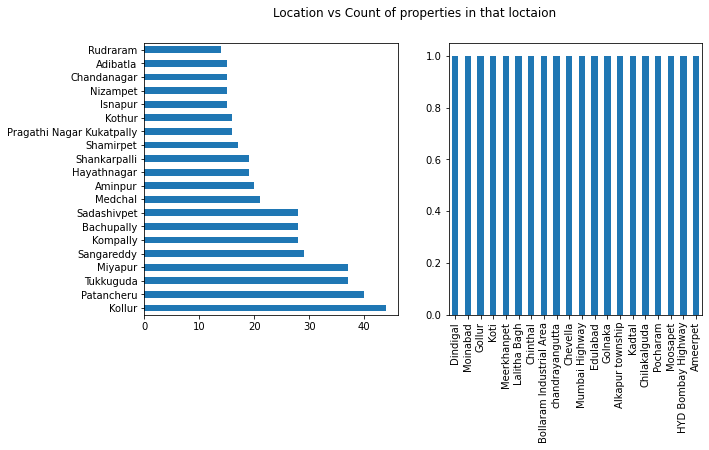

In [72]:
location(w2)

In [73]:
len((w['place'].value_counts())==1)

272

C:\Users\shing\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


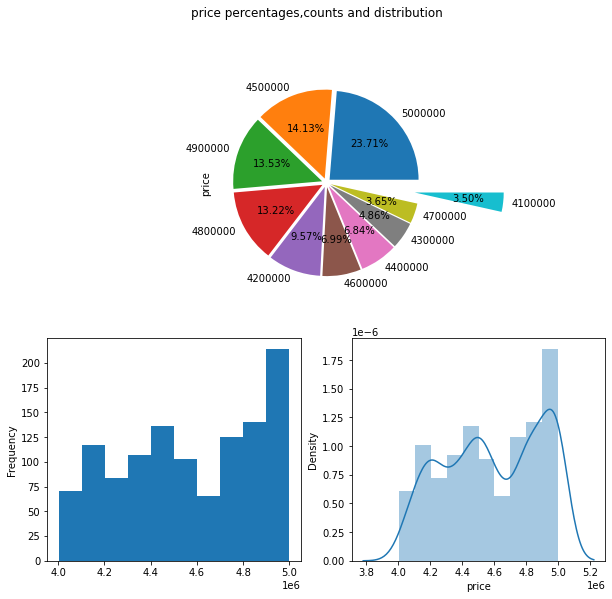

In [74]:
price(w)


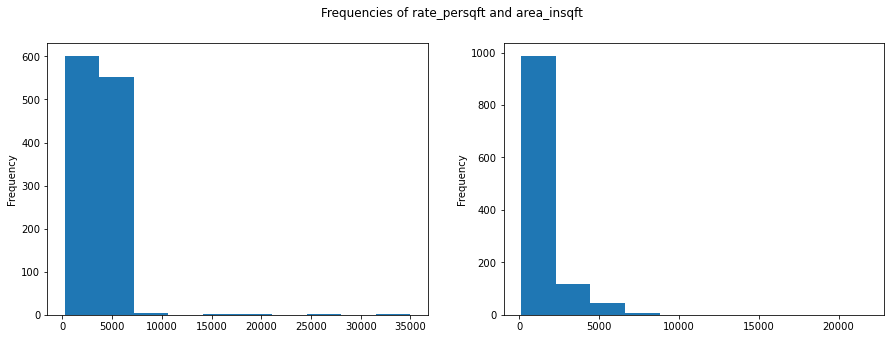

In [75]:
area_rate(w)

In [76]:

w['status'].value_counts()

Under Construction    412
New                   391
Ready to move         287
Resale                 72
Name: status, dtype: int64

C:\Users\shing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


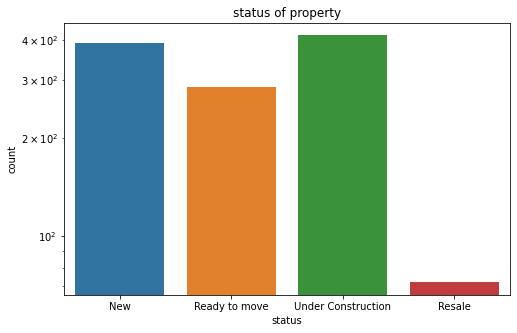

In [77]:
b_status(w)

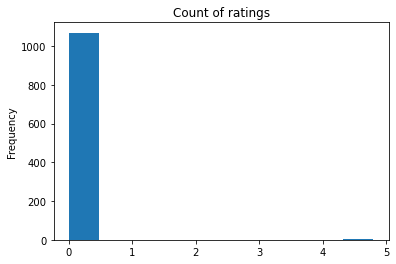

In [78]:
rating(w)

In [80]:
r=df[(df['price']>5000000)&(df['price']<=6000000)]
r.shape

(1434, 9)

In [81]:
r1=r['title'].value_counts()
r1

2  BHK  Apartment            863
Residential Plot             254
3  BHK  Apartment            162
2  BHK  Independent Floor     71
2  BHK  Independent House     56
4  BHK  Apartment              6
2  BHK  Villa                  6
3  BHK  Villa                  6
1  BHK  Independent House      3
3  BHK  Independent House      2
4  BHK  Villa                  1
3  BHK  Independent Floor      1
1  BHK  Apartment              1
1  BHK  Villa                  1
5  BHK  Independent House      1
Name: title, dtype: int64

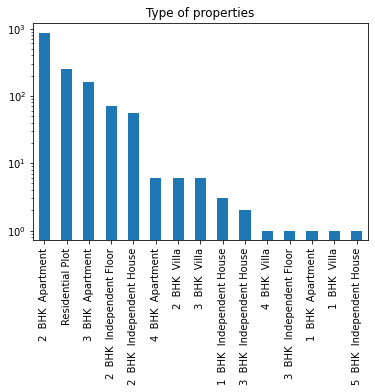

In [82]:
title(r1)


In [83]:
r2=r['place'].value_counts()
r2

Bachupally                   82
Miyapur                      71
Ameenpur                     57
Pragathi Nagar Kukatpally    56
Kompally                     55
                             ..
GPR Layout                    1
Golnaka                       1
Mirkhanpet                    1
Kothapet                      1
Mahadevpur Colony             1
Name: place, Length: 318, dtype: int64

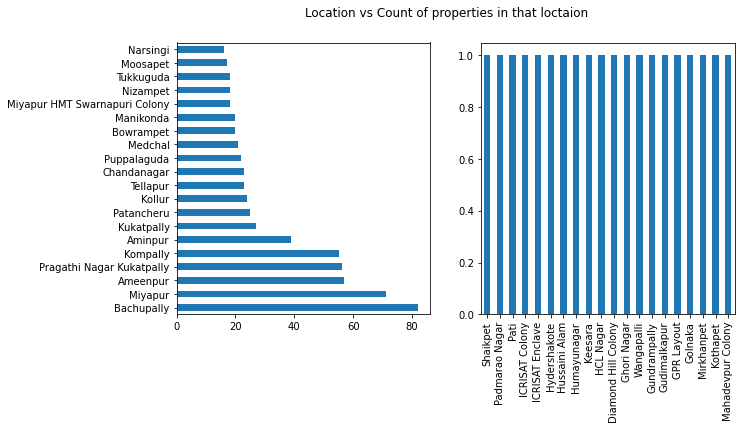

In [84]:
location(r2)

In [85]:
len((r['place'].value_counts())==1)

318

C:\Users\shing\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


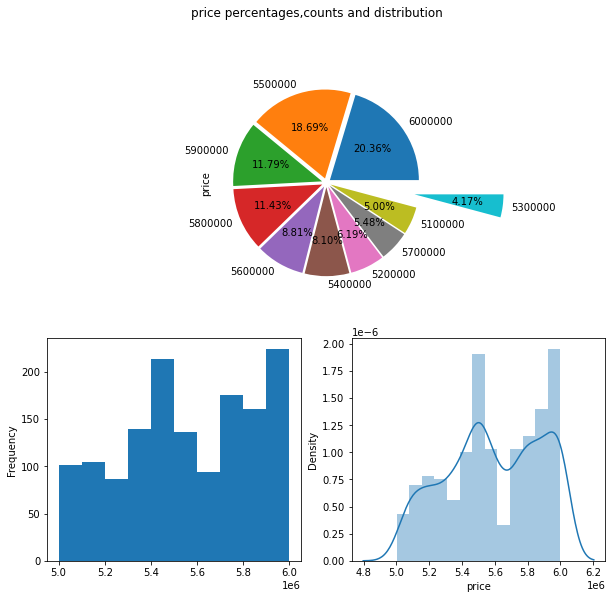

In [86]:
price(r)


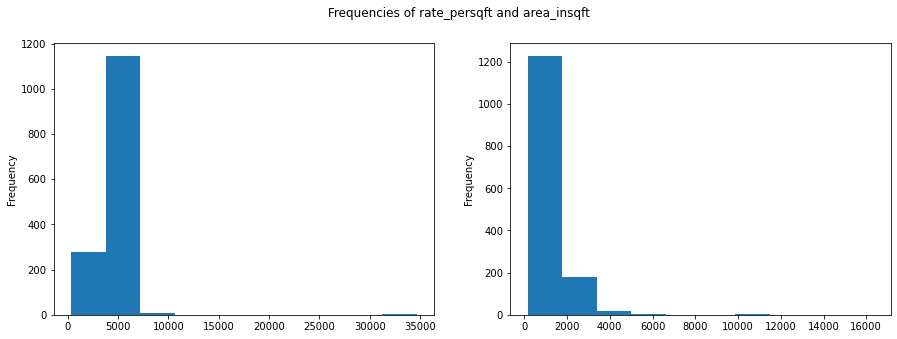

In [87]:
area_rate(r)

In [88]:
r['status'].value_counts()

Under Construction    619
Ready to move         561
New                   201
Resale                 53
Name: status, dtype: int64

C:\Users\shing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


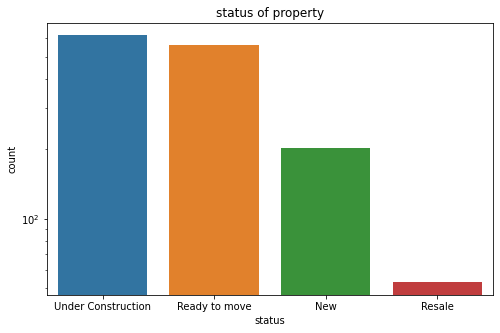

In [89]:
b_status(r)

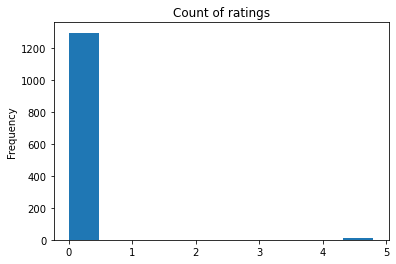

In [90]:
rating(r)

In [91]:
t=df[(df['price']>6000000)&(df['price']<=7000000)]
t.shape

(1239, 9)

In [92]:
t1=t['title'].value_counts()
t1

2  BHK  Apartment            634
3  BHK  Apartment            304
Residential Plot             138
2  BHK  Independent House     81
2  BHK  Independent Floor     34
3  BHK  Villa                 21
3  BHK  Independent House      9
4  BHK  Apartment              7
1  BHK  Apartment              3
4  BHK  Independent House      3
2  BHK  Villa                  2
3  BHK  Independent Floor      2
1  BHK  Independent House      1
Name: title, dtype: int64

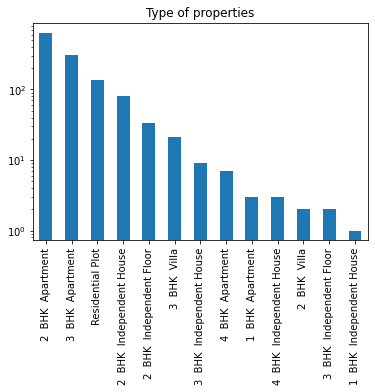

In [93]:
title(t1)

In [94]:
t2=t['place'].value_counts()
t2

Miyapur                      98
Bachupally                   75
Chandanagar                  39
Pragathi Nagar Kukatpally    36
Kollur                       29
                             ..
HB Colony Main Road           1
Hasmathpet                    1
Mirkhanpet                    1
Hakimpet                      1
Thumkunta                     1
Name: place, Length: 293, dtype: int64

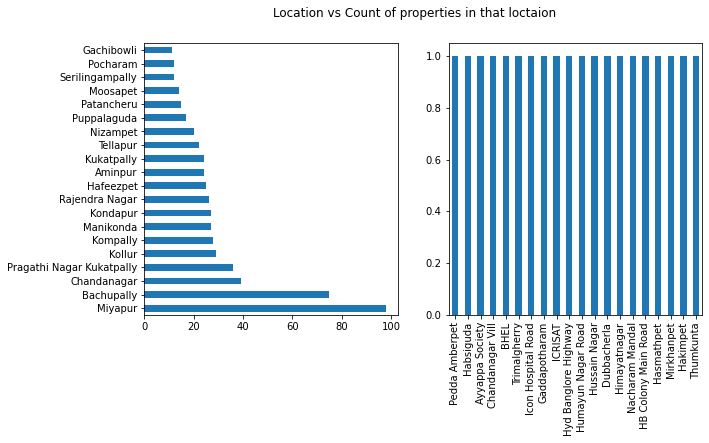

In [95]:
location(t2)


In [96]:
len((t['place'].value_counts())==1)

293

C:\Users\shing\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


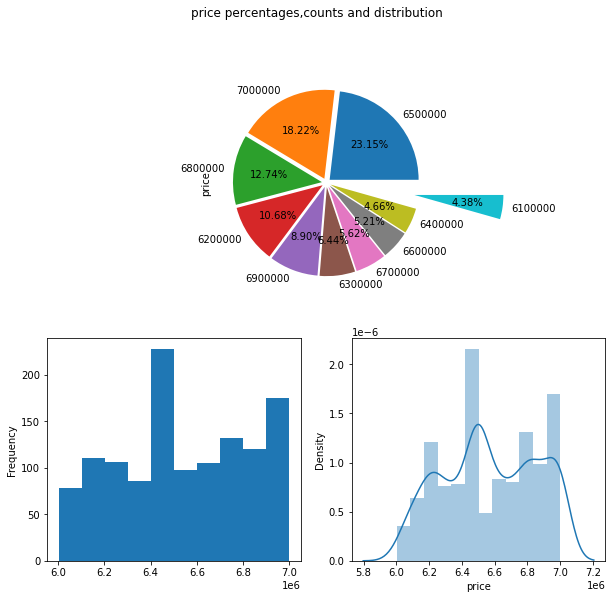

In [97]:
price(t)

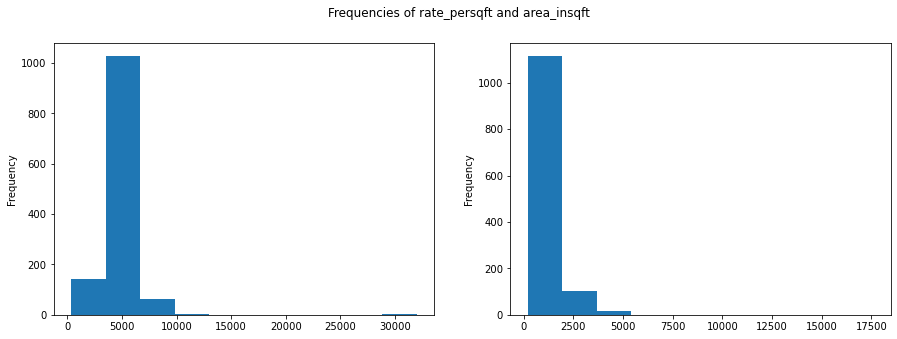

In [98]:
area_rate(t)

In [99]:
t['status'].value_counts()

Ready to move         596
Under Construction    505
New                   101
Resale                 37
Name: status, dtype: int64

C:\Users\shing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


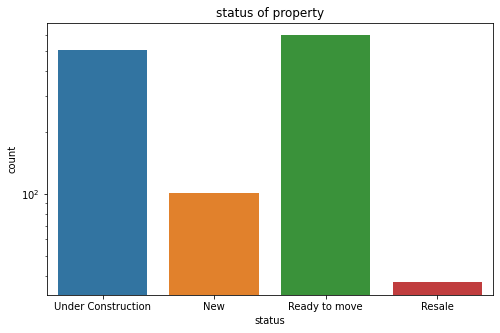

In [100]:
b_status(t)

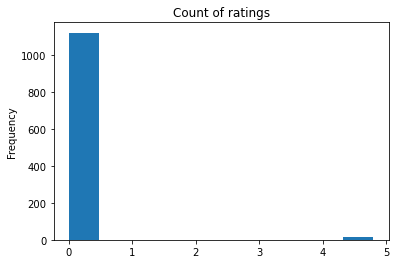

In [101]:
rating(t)

In [102]:
u=df[(df['price']>7000000)&(df['price']<=8000000)]
u.shape

(1103, 9)

In [103]:
u1=u['title'].value_counts()
u1

2  BHK  Apartment            453
3  BHK  Apartment            431
Residential Plot             102
2  BHK  Independent House     55
3  BHK  Villa                 22
2  BHK  Independent Floor      7
4  BHK  Villa                  6
3  BHK  Independent House      6
3  BHK  Independent Floor      6
4  BHK  Apartment              5
2  BHK  Villa                  4
4  BHK  Independent House      3
1  BHK  Independent House      1
1  BHK  Apartment              1
6  BHK  Independent House      1
Name: title, dtype: int64

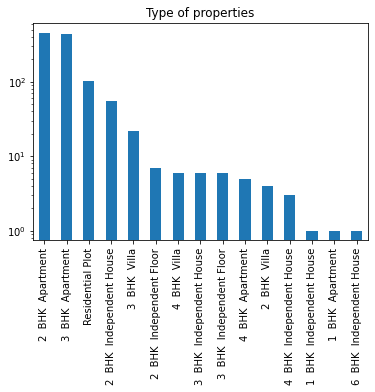

In [104]:
title(u1)


In [105]:
u2=u['place'].value_counts()
u2

Miyapur              78
Bachupally           59
Kukatpally           47
Kondapur             42
Manikonda            37
                     ..
Hakimpet              1
Moosarambagh Road     1
Chegunta              1
Bhuvanagiri           1
Dullapally            1
Name: place, Length: 228, dtype: int64

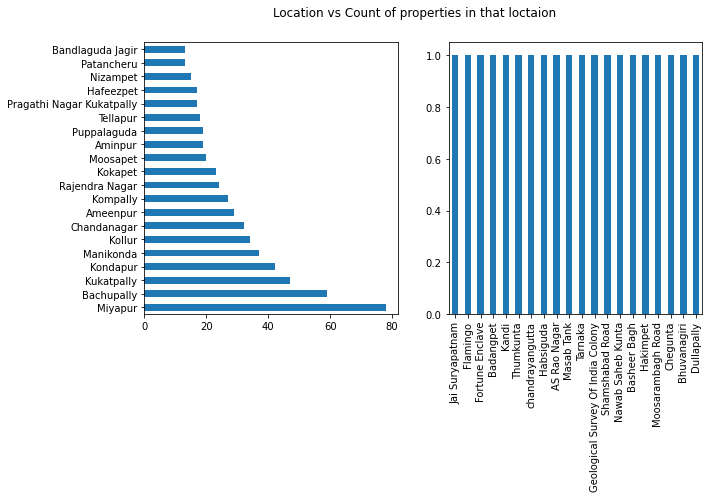

In [106]:
location(u2)

In [107]:
len((u['place'].value_counts())==1)

228

C:\Users\shing\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


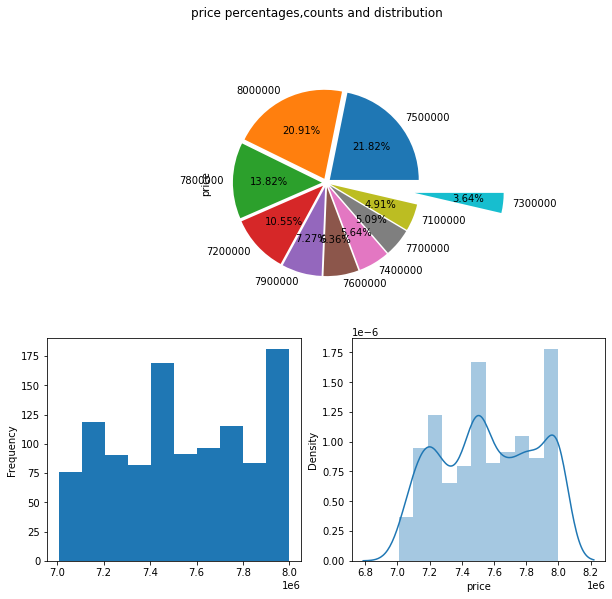

In [108]:
price(u)

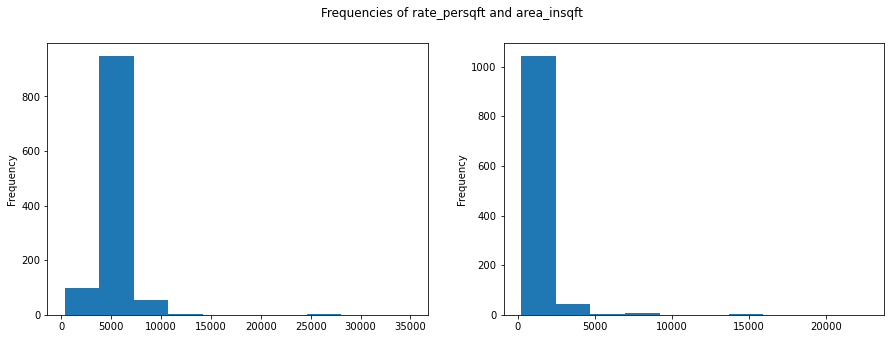

In [109]:
area_rate(u)

In [110]:
u['status'].value_counts()

Under Construction    551
Ready to move         450
New                    74
Resale                 28
Name: status, dtype: int64

C:\Users\shing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


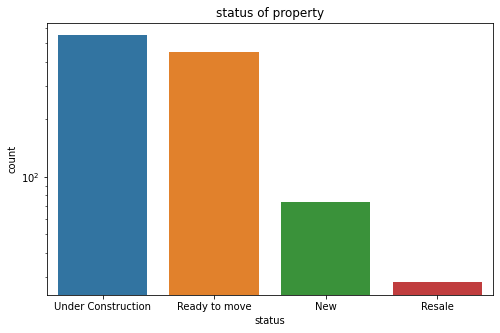

In [111]:
b_status(u)

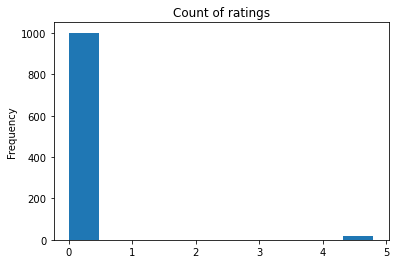

In [112]:
rating(u)

In [113]:
z=df[(df['price']>8000000)&(df['price']<=9000000)]
z.shape

(879, 9)

In [114]:
z1=z['title'].value_counts()
z1

3  BHK  Apartment            419
2  BHK  Apartment            269
Residential Plot              79
2  BHK  Independent House     40
3  BHK  Villa                 25
4  BHK  Independent House     10
3  BHK  Independent House      9
4  BHK  Apartment              9
3  BHK  Independent Floor      4
2  BHK  Independent Floor      3
2  BHK  Villa                  3
5  BHK  Independent House      3
4  BHK  Villa                  2
4  BHK  Independent Floor      1
6  BHK  Independent House      1
1  BHK  Apartment              1
5  BHK  Apartment              1
Name: title, dtype: int64

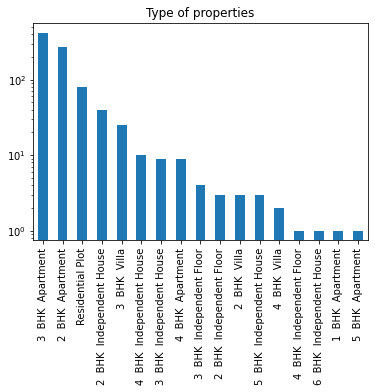

In [115]:
title(z1)

In [117]:
z2=z['place'].value_counts()
z2

Bachupally           55
Manikonda            45
Kukatpally           42
Miyapur              39
Kondapur             35
                     ..
Sathamrai Village     1
Upparpally            1
kphb colony           1
Annojiguda            1
Rakshapuram           1
Name: place, Length: 192, dtype: int64

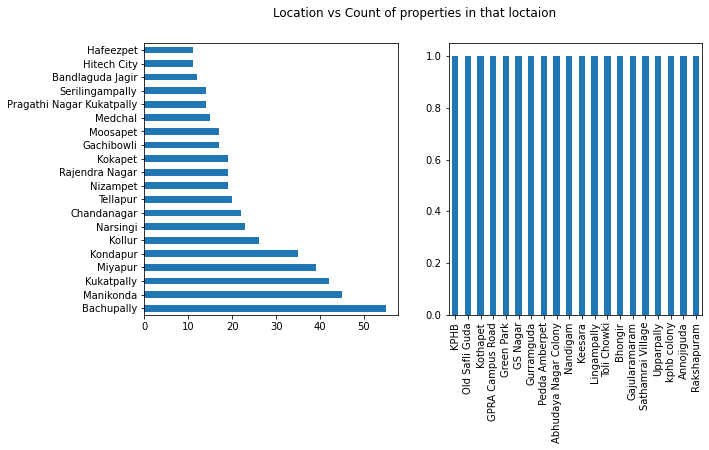

In [118]:
location(z2)

In [119]:
len((z['place'].value_counts())==1)

192

C:\Users\shing\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


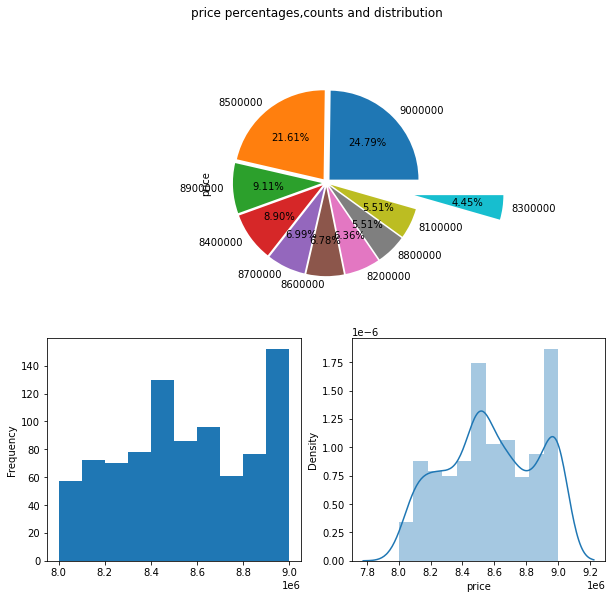

In [120]:
price(z)

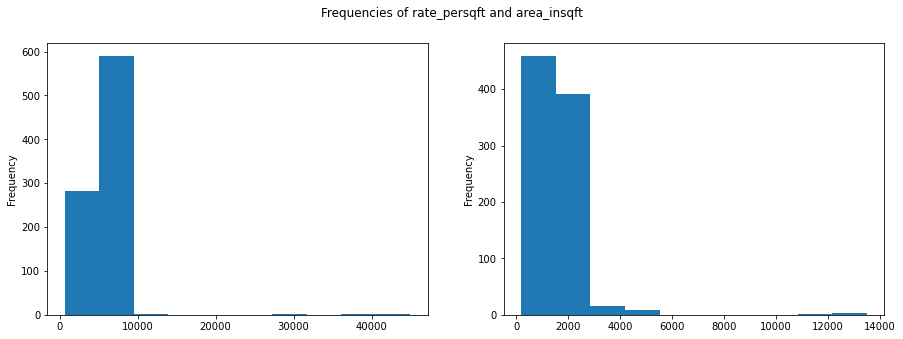

In [121]:
area_rate(z)

In [122]:
z['status'].value_counts()

Under Construction    440
Ready to move         360
New                    47
Resale                 32
Name: status, dtype: int64

C:\Users\shing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


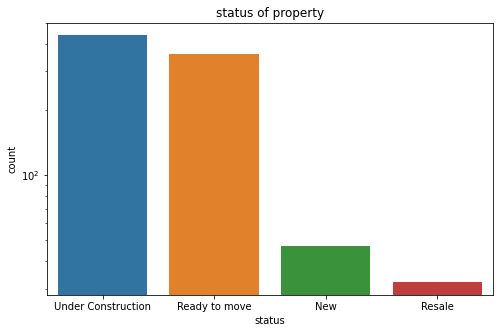

In [123]:
b_status(z)

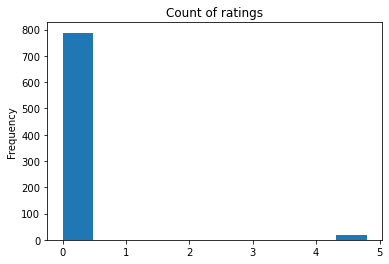

In [124]:
rating(z)

In [125]:
s=df[(df['price']>9000000)&(df['price']<=10000000)]
s.shape

(690, 9)

In [126]:
s1=s['title'].value_counts()
s1

3  BHK  Apartment            372
2  BHK  Apartment            112
Residential Plot              69
3  BHK  Villa                 49
2  BHK  Independent House     20
3  BHK  Independent House     18
4  BHK  Independent House     13
4  BHK  Villa                 12
4  BHK  Apartment             11
2  BHK  Villa                  6
5  BHK  Independent House      2
1  BHK  Independent House      1
1  BHK  Independent Floor      1
6  BHK  Independent Floor      1
5  BHK  Apartment              1
7  BHK  Apartment              1
3  BHK  Independent Floor      1
Name: title, dtype: int64

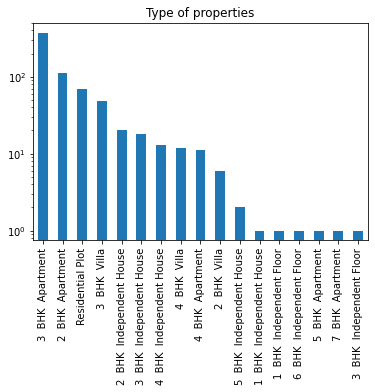

In [127]:
title(s1)

In [128]:
s2=s['place'].value_counts()
s2

Miyapur                 46
Kukatpally              40
Kondapur                36
Nizampet                23
Manikonda               23
                        ..
Pasumamula               1
Nandigama                1
Chaitanyapuri Colony     1
Basuragadi Village       1
Yapral                   1
Name: place, Length: 156, dtype: int64

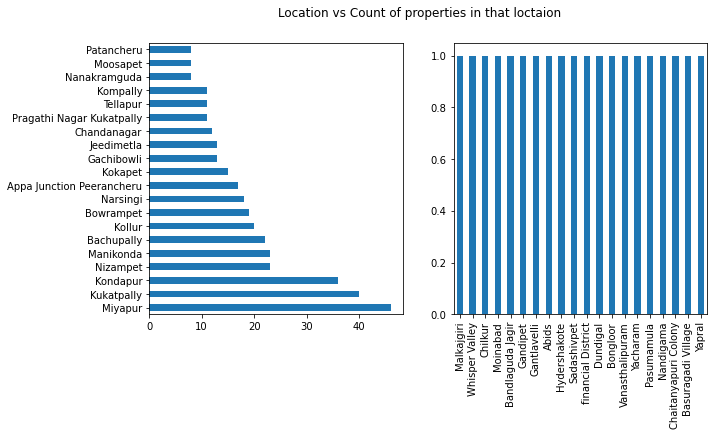

In [129]:
location(s2)

In [130]:
len((s['place'].value_counts())==1)

156

C:\Users\shing\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


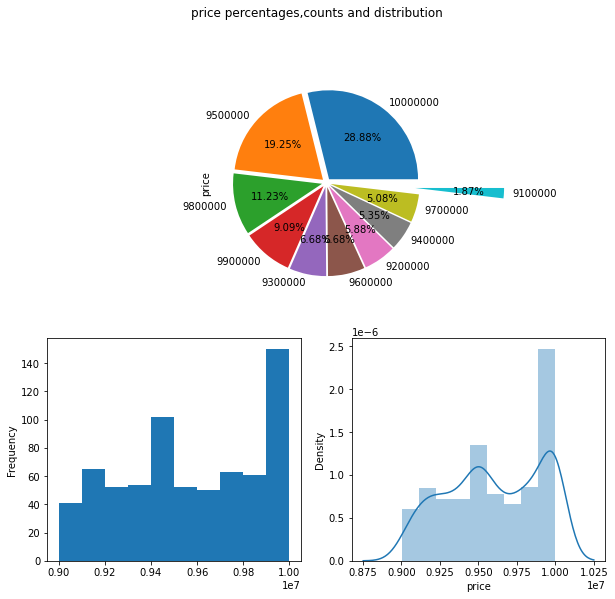

In [131]:
price(s)

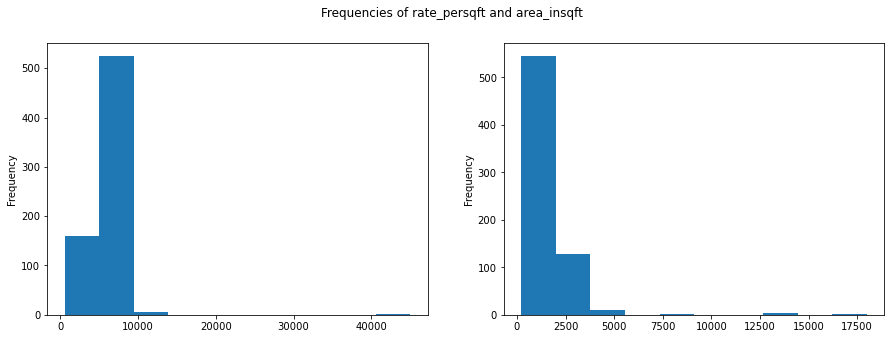

In [132]:
area_rate(s)

In [133]:
s['status'].value_counts()

Under Construction    382
Ready to move         239
New                    46
Resale                 23
Name: status, dtype: int64

C:\Users\shing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


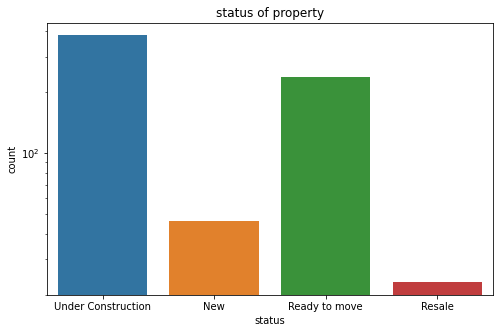

In [134]:
b_status(s)

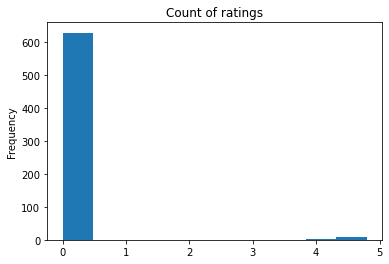

In [135]:
rating(s)

In [137]:
n=df[(df['price']>10000000)&(df['price']<=700000000)]
n.shape

(4096, 9)

In [138]:
n1=n['title'].value_counts()
n1

3  BHK  Apartment             1580
4  BHK  Villa                  530
3  BHK  Villa                  465
Residential Plot               420
4  BHK  Apartment              292
4  BHK  Independent House      145
2  BHK  Apartment              145
3  BHK  Independent House      115
5  BHK  Villa                   75
5  BHK  Apartment               64
5  BHK  Independent House       57
2  BHK  Independent House       44
6  BHK  Independent House       37
2  BHK  Villa                   26
7  BHK  Independent House       15
8  BHK  Independent House       14
6  BHK  Villa                   13
10  BHK  Independent House      11
3  BHK  Independent Floor        9
4  BHK  Independent Floor        6
9  BHK  Independent House        6
2  BHK  Independent Floor        4
10  BHK  Villa                   3
8  BHK  Villa                    3
6  BHK  Independent Floor        3
1  BHK  Apartment                3
7  BHK  Apartment                2
6  BHK  Apartment                1
7  BHK  Villa       

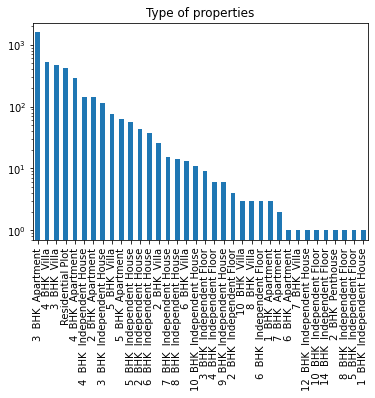

In [139]:
title(n1)    

In [141]:
n2=n['place'].value_counts()
n2

Kondapur             266
Nanakramguda         159
Kokapet              138
Gachibowli           138
Narsingi             126
                    ... 
Chevella               1
Manikonda Road         1
Old Malakpet           1
Attapur Ring Road      1
Mailardevpally         1
Name: place, Length: 322, dtype: int64

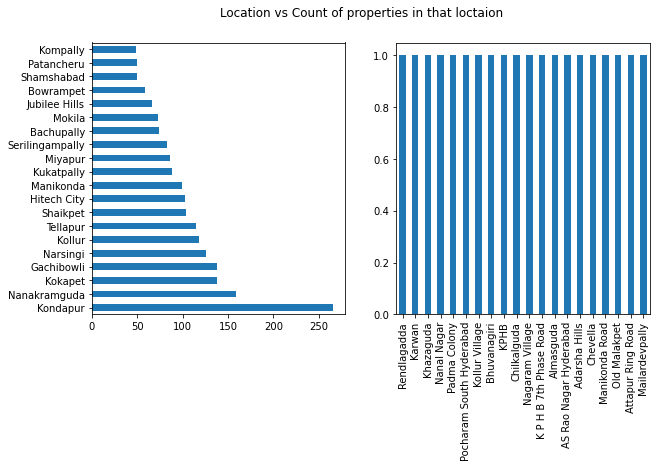

In [142]:
location(n2)

In [143]:

len((n['place'].value_counts())==1)

322

C:\Users\shing\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


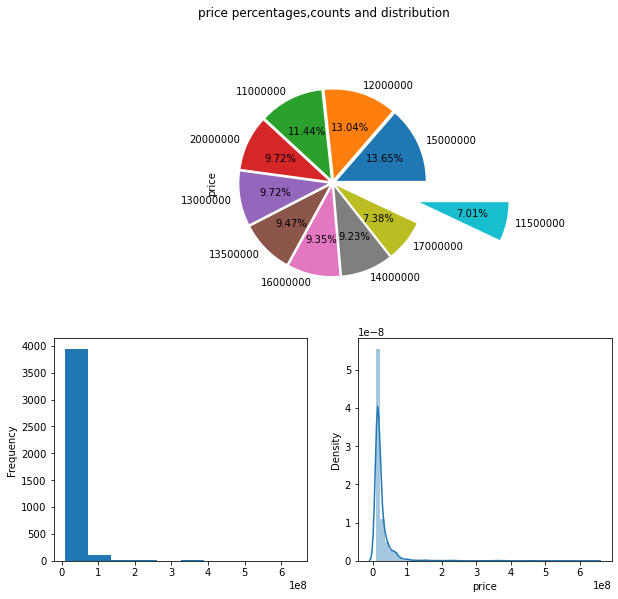

In [144]:
price(n)


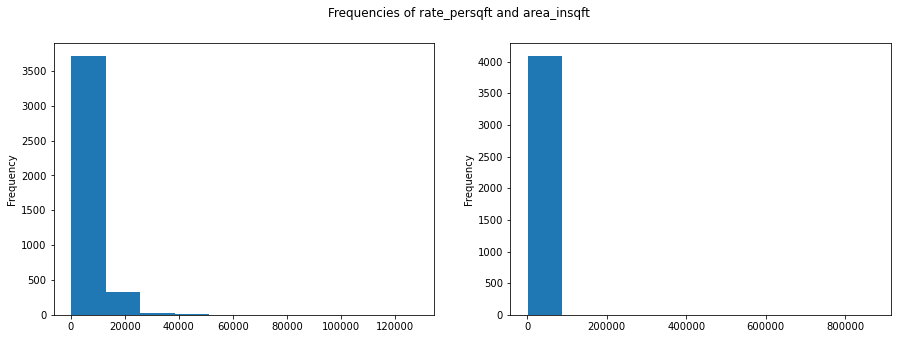

In [145]:
area_rate(n)

In [146]:
n['status'].value_counts()

Under Construction    2009
Ready to move         1667
New                    230
Resale                 190
Name: status, dtype: int64

C:\Users\shing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


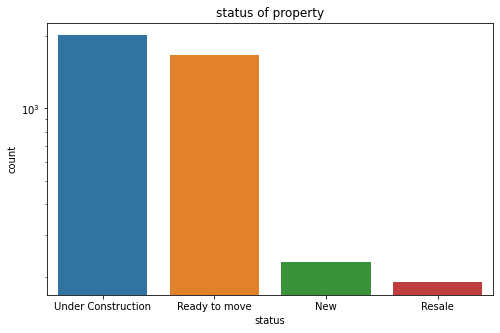

In [147]:
b_status(n)

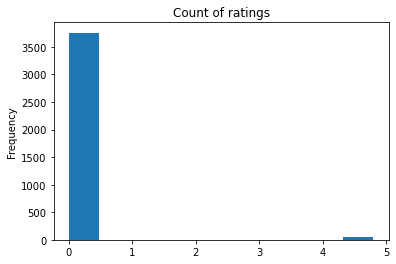

In [148]:

rating(n)